## Кутдусов Руслан 

##### Условие

Задана функция $f(x) = x^2 \cdot (1 - \cos x)$ , определенная на отрезке $[-1, 1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью $\varepsilon = 10^{-8}$  и произвести экономизацию полученного степенного ряда.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(x):
    return x**2 * (1 - np.cos(x))

In [3]:
def c_i(i):
    if i > 2 and i % 2 == 0:
        return (-1) ** (i / 2) / (np.math.factorial(i - 2)) 
    else:
        return 0

In [4]:
def P(x, n):
    return sum(c_i(i) * x ** i for i in range(n))

In [5]:
def RP(x, n): #погрешность
    return abs(f(x) - P(x, n))

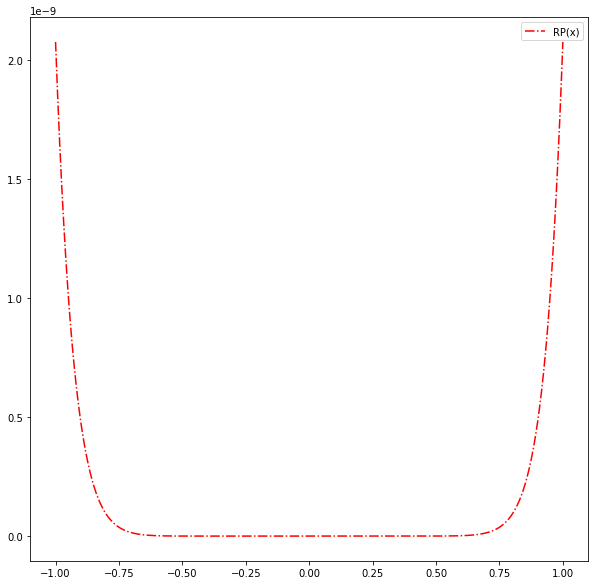

In [6]:
fig = plt.figure(figsize=(10, 10))
z = np.linspace(-1, 1, 1000)
ax = fig.add_subplot()
ax.plot(z, RP(z, 13), color = 'red', ls = '-.',label = 'RP(x)')
ax.legend()

Получается 13 - требуемое количество слагаемых для достижения требуемой точности $\varepsilon$.

In [7]:
def T(x, n): # многочлен Чебышева
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2*x*T(x, n - 1) - T(x, n - 2)

$x^{12} = \frac{1}{2048} \cdot (6144 x^{10} - 6912 x^{8} + 3584 x^{6} - 840 x^{4} + 72 x^2 -1 + T_{12})$

In [8]:
def P_(x, n):
    return P(x, n) + c_i(n) * (6144 * x ** 10 - 6912 * x ** 8 + 3584 * x ** 6 - 840 * x ** 4 + 72 * x ** 2 - 1) / 2048

In [9]:
def RP_ (x, n):
    return abs(f(x) - P_(x, n))

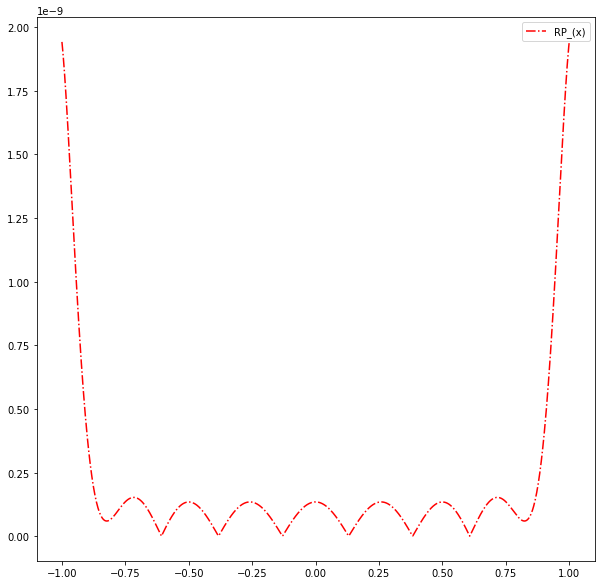

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(z, RP_(z, 12), color = 'red', ls = '-.',label = 'RP_(x)')
ax.legend()

$x^{10} = \frac{1}{512} \cdot (1280 x^8 - 1120 x^6 + 400 x^4 - 50 x^2 + 1 + T_{10})$

In [14]:
def P__ (x, n):
     return P_(x, n) + c_i(n) * (1280 * x ** 8 - 1120 * x ** 6 + 400 * x ** 4 - 50 * x ** 2 + 1) / 512

In [15]:
def RP__(x, n):
    return abs(f(x) - P__(x, n))

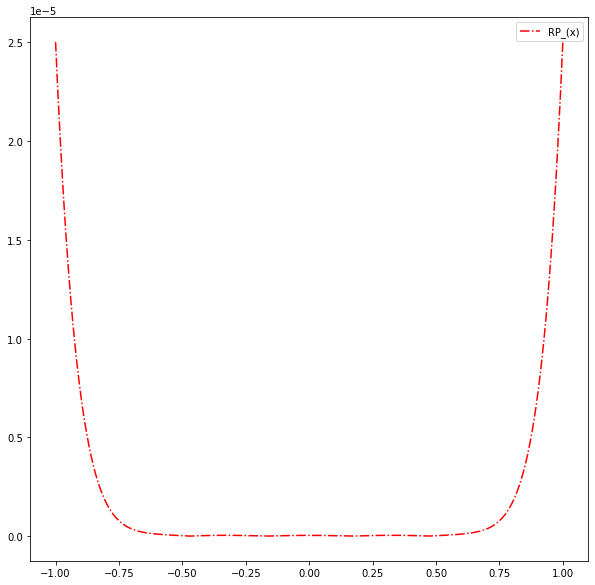

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.plot(z, RP__(z, 10), color = 'red', ls = '-.',label = 'RP_(x)')
ax.legend()

Мы приходим к тому, что ряд можно сократить до $S_{10} (x)$ и сохранить необходимую точность.